In [55]:
#libraries importation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU, Conv1D,Conv2D, Bidirectional, MaxPooling1D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, TimeDistributed, RepeatVector
from keras.optimizers import Adam , SGD , RMSprop


In [56]:
#setting option for full data presentation
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [57]:
#Loading the dataset
df = pd.read_csv('creditcard.csv')

In [58]:
#Sliced_data = df[0:45000]

In [59]:
#Sliced_data.to_csv('Reduced_Credit_Card_Data.csv')

In [60]:
#Check the first 5 rows
df.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#check the shape
df.shape

(284807, 31)

In [6]:
#data description
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
#Check the datatypes
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [10]:
#Check the class distribution
print(df['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64


In [30]:
#checking for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
#checking correlation
df.drop("Class", axis=1).apply(lambda x: x.corr(df.Class))

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
dtype: float64

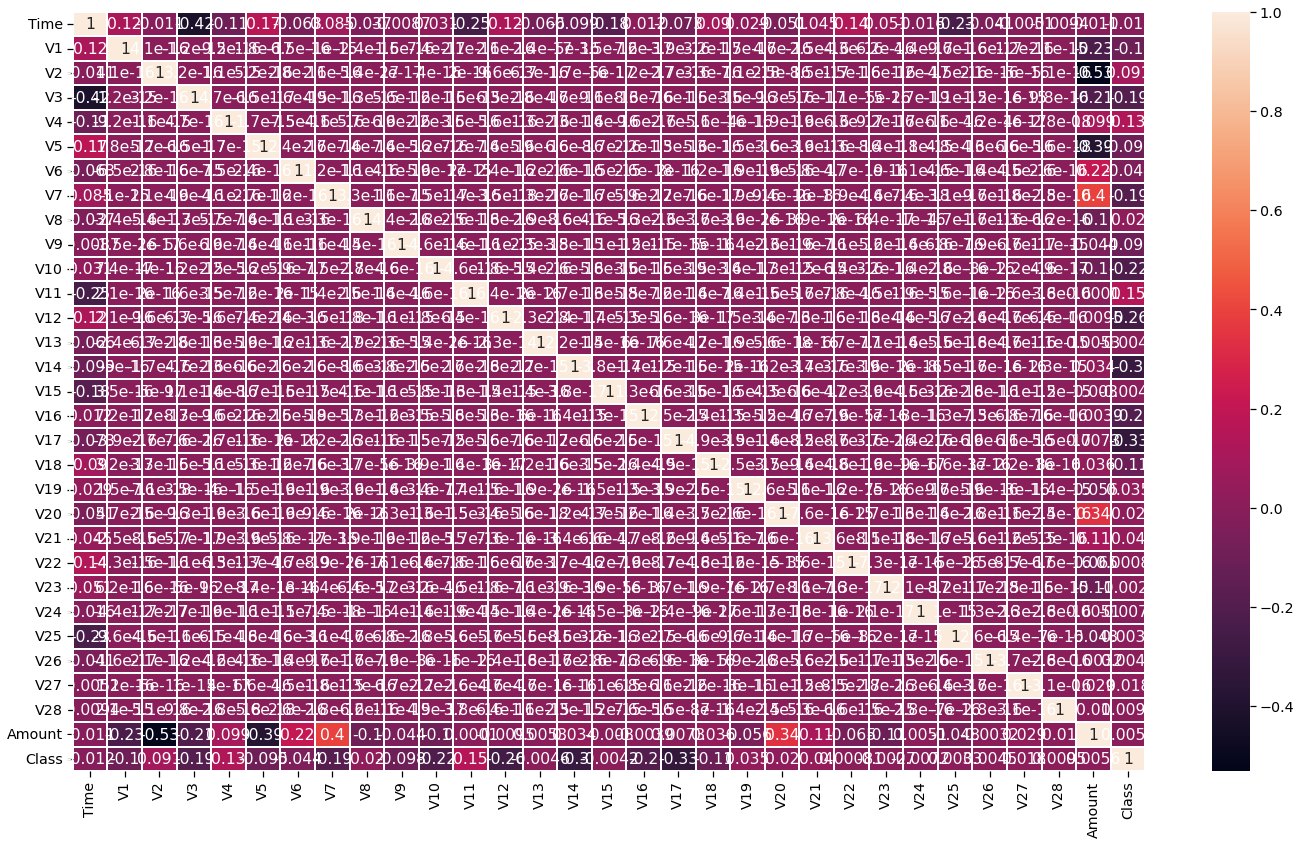

In [9]:
#plotting correlation
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(df.corr(),annot=True,linewidth =2)
plt.tight_layout()

In [12]:
#function for mi_scores
def calculate_datami_scores(X, y):
    X = X.copy()
    mi_scores = mutual_info_classif(X, y, random_state=0)
    mi_scores = pd.Series(mi_scores, name='Mutual Information Scores', index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return(mi_scores)


In [13]:
#function plot of the mi_scores
def plot_mi_scores_1(scores):
    scores1 = scores1.sort_values(ascending=True)
    width = np.arange(len(scores1))
    ticks = list(scores1.index)
    plt.subplots(figsize=(5, 12))
    plt.barh(width, scores1,height=0.5, align='edge')
    plt.yticks(width, ticks, fontsize=9)
    plt.title('Mutual Information Scores')



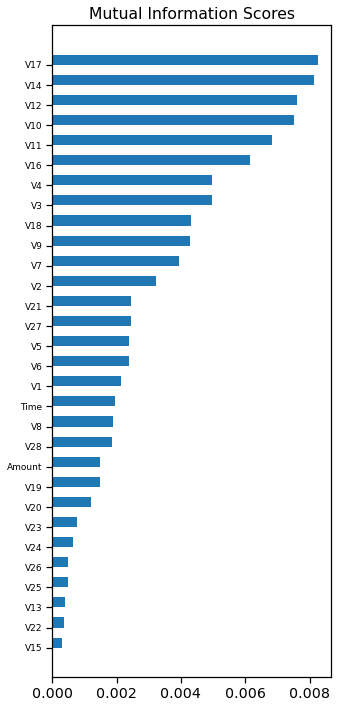

In [14]:
# Define X and y
X = df.copy()
y = X.pop('Class')


mi_scores = calculate_datami_scores(X, y)
#display(mi_scores)
plot_mi_scores_1(mi_scores)

**SMOTE Class Imbalance**

In [44]:
sm =  SMOTE(random_state=12, sampling_strategy=0.7)

X_sm, y_sm =  sm.fit_resample(X,y)

X_sm.shape, y_sm.shape


print(Counter(y))
print(Counter(y_sm))

Counter({0: 284315, 1: 492})
Counter({0: 284315, 1: 199020})


In [19]:
# Split into validation and training data
X_train, X_valid, y_train, y_valid = train_test_split(X_sm, y_sm, train_size=0.70, random_state=42)

# To standardize features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)

In [20]:
#train set shape
X_train.shape

(338334, 30)

In [21]:
#test set shape
y_valid.shape

(145001,)

**Simple Neural Network**

In [22]:
#simple ANN model
simple_an = Sequential()
simple_an.add(Dense(64, input_dim=30, activation='relu')) 
simple_an.add(Dense(32, activation='relu'))
simple_an.add(Dense(16, activation='relu'))
simple_an.add(Dense(8, activation='relu'))
simple_an.add(Dense(1, activation='sigmoid'))
simple_an.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
simple_an.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [24]:
#fiting the simple ann algorithm
kist = simple_an.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

Epoch 1/5
10573/10573 [==============================] - 20s 2ms/step - loss: 0.0226 - accuracy: 0.9925 - val_loss: 0.0085 - val_accuracy: 0.9974
Epoch 2/5
10573/10573 [==============================] - 19s 2ms/step - loss: 0.0072 - accuracy: 0.9978 - val_loss: 0.0041 - val_accuracy: 0.9990
Epoch 3/5
10573/10573 [==============================] - 20s 2ms/step - loss: 0.0053 - accuracy: 0.9985 - val_loss: 0.0038 - val_accuracy: 0.9990
Epoch 4/5
10573/10573 [==============================] - 19s 2ms/step - loss: 0.0046 - accuracy: 0.9988 - val_loss: 0.0038 - val_accuracy: 0.9991
Epoch 5/5
10573/10573 [==============================] - 19s 2ms/step - loss: 0.0036 - accuracy: 0.9990 - val_loss: 0.0027 - val_accuracy: 0.9994


In [26]:
#simple ANN model evaluation
loss, acc_train = simple_an.evaluate(X_train ,y_train,verbose=0)
loss, acc_test = simple_an.evaluate(X_valid ,y_valid,verbose=0)
print("Accuracy on Train Set: ",acc_train)
print("Accuracy on Test Set: ",acc_test)

Accuracy on Train Set:  0.9994975328445435
Accuracy on Test Set:  0.999393105506897


**LSTM**

In [42]:
#LSTM model
model_lstm=Sequential()
model_lstm.add(LSTM(256, input_shape=(X_train.shape[1],1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(64, activation = 'relu'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(32))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1))
model_lstm.compile(loss='binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
model_lstm.summary()
lstm_model = model_lstm.fit(X_train, y_train, epochs=5 , batch_size = 50,verbose=2, validation_data = (X_valid,y_valid))   

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_18 (Dropout)        (None, 256)               0         
                                                                 
 dense_26 (Dense)            (None, 64)                16448     
                                                                 
 dropout_19 (Dropout)        (None, 64)                0         
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 dropout_20 (Dropout)        (None, 32)                0         
                                                                 
 dense_28 (Dense)            (None, 1)               

In [43]:
#Model evaluation
loss, acc_train = model_lstm.evaluate(X_train ,y_train,verbose=0)
loss, acc_test = model_lstm.evaluate(X_valid ,y_valid,verbose=0)

print("Accuracy score on Test Set: ",acc_test)

Accuracy score on Test Set:  0.9539589285850525


### CNN

In [35]:
#CNN model
cnn = Sequential()
cnn.add(Conv1D(filters=16, kernel_size=3, input_shape=(np.shape(X_train)[1],1)))
cnn.add(Flatten())
cnn.add(Dropout(0.4))
cnn.add(Dense(64))
cnn.add(Dense(1))
cnn.compile(loss='mse', optimizer='adam',metrics = ['accuracy'])
cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 28, 16)            64        
                                                                 
 flatten_2 (Flatten)         (None, 448)               0         
                                                                 
 dropout_5 (Dropout)         (None, 448)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                28736     
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 28,865
Trainable params: 28,865
Non-trainable params: 0
_________________________________________________________________


In [36]:
model_cnn = cnn.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
10573/10573 [==============================] - 75s 7ms/step - loss: 0.0804 - accuracy: 0.9257 - val_loss: 0.0699 - val_accuracy: 0.9374
Epoch 2/50
10573/10573 [==============================] - 74s 7ms/step - loss: 0.0734 - accuracy: 0.9305 - val_loss: 0.0700 - val_accuracy: 0.9326
Epoch 3/50
10573/10573 [==============================] - 75s 7ms/step - loss: 0.0732 - accuracy: 0.9304 - val_loss: 0.0696 - val_accuracy: 0.9298
Epoch 4/50
10573/10573 [==============================] - 74s 7ms/step - loss: 0.0729 - accuracy: 0.9310 - val_loss: 0.0699 - val_accuracy: 0.9358
Epoch 5/50
10573/10573 [==============================] - 74s 7ms/step - loss: 0.0729 - accuracy: 0.9306 - val_loss: 0.0695 - val_accuracy: 0.9334
Epoch 6/50
10573/10573 [==============================] - 73s 7ms/step - loss: 0.0729 - accuracy: 0.9311 - val_loss: 0.0692 - val_accuracy: 0.9324
Epoch 7/50
10573/10573 [==============================] - 73s 7ms/step - loss: 0.0729 - accuracy: 0.9310 - val_loss: 0

In [37]:
#Evaluation
loss, acc_train = cnn.evaluate(X_train ,y_train,verbose=0)
loss, acc_test = cnn.evaluate(X_valid ,y_valid,verbose=0)
print("Accuracy on Train Set: ",acc_train)
print("Accuracy on Test Set: ",acc_test)

Accuracy on Train Set:  0.9351617097854614
Accuracy on Test Set:  0.9347935318946838
